In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gridworld
import argparse

algorithm='sarsa'
# algorithm='value_iteration'

def get_alg_module(alg, submodule=None):
    from importlib import import_module
    submodule = submodule or alg
    try:
        # first try to import the alg module from baselines
        alg_module = import_module('.'.join(['models', alg, submodule]))
    except ImportError:
        # then from rl_algs
        alg_module = import_module('.'.join(['rl_' + 'algs', alg, submodule]))

    return alg_module


def get_learn_function(alg):
    return get_alg_module(alg).learn


# Create environment
env = gridworld.GridWorld(hard_version=False)

parser = argparse.ArgumentParser()
parser.add_argument('--alg', help='algorithm to use', default='policy_iteration')
args, unknown = parser.parse_known_args()
args.alg = algorithm

print(args.alg)

# Create environment
env = gridworld.GridWorld(hard_version=False)

learn = get_learn_function(args.alg)
model = learn(env, epsilon=0.2, alpha=0.3, max_it=20)

# Initialize simulation
s = env.reset()

# Create log to store data from simulation
log = {
    't': [0],
    's': [s],
    'a': [],
    'r': [],
}

# Simulate until episode is done
done = False

while not done:
    a = model.get_policy(s)
    (s, r, done) = env.step(a)
    log['t'].append(log['t'][-1] + 1)
    log['s'].append(s)
    log['a'].append(a)
    log['r'].append(r)

    model.get_log().add('trajectory', env.get_pos(s), 'trajectory', color='red', alpha=0.5)

sarsa
[[ 1.65019534e-01  8.69155941e-02 -1.81339263e-01  3.79456073e+00]
 [ 1.74698102e+01  1.68448103e+01  1.99813513e+01  1.90264571e+01]
 [ 3.73103662e-01  3.50912397e-01  5.82351036e+00  2.32587550e-01]
 [ 4.66961172e+00  1.28337821e-01  1.45272164e-01  5.17264568e-01]
 [ 2.14576548e-01  5.41099825e-01  2.88067893e+00  3.65422288e-01]
 [ 1.60044957e+01  7.42029871e-01  3.77145432e-01  4.95913506e-01]
 [ 1.12675838e+01  1.25069896e+01  1.05939809e+01  1.17098637e+01]
 [ 1.95200762e+00  4.72276961e-01  1.41639987e+01  3.67188562e+00]
 [ 6.48847034e-02  3.37172409e-02  4.12210170e+00  1.01455788e-01]
 [-4.66074198e-02  1.36392604e+00  5.07673137e-01  4.96165854e-01]
 [ 5.43876163e-01  1.34869032e+01  3.05465527e+00  6.57173497e-01]
 [ 9.88998252e+00  1.65775547e+01  3.34741277e+00  7.02408446e+00]
 [ 1.56921686e+00  5.53144129e+00  1.48407880e+01  8.98657916e-01]
 [ 3.98519902e-01  1.23925769e+00  7.19847212e+00  6.18012658e-01]
 [ 3.02342401e-02  3.69425931e-01  9.87254828e-01  4.337

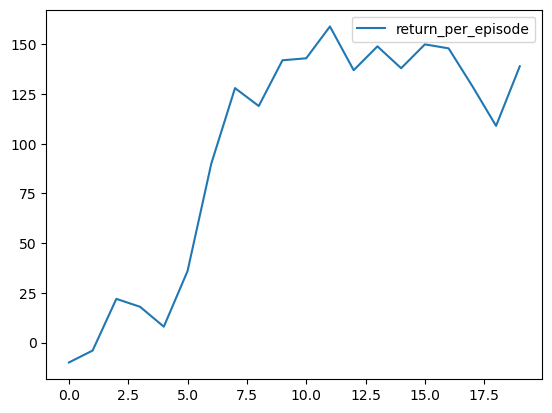

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


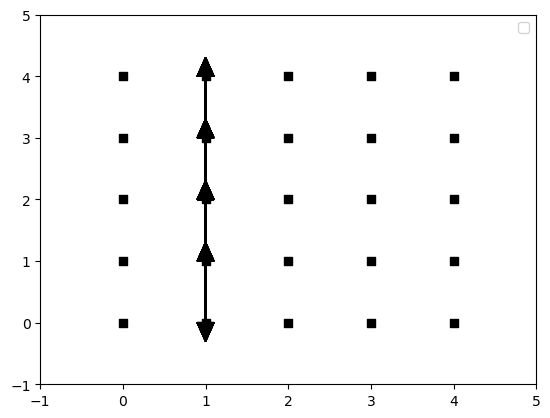

[(4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1)]


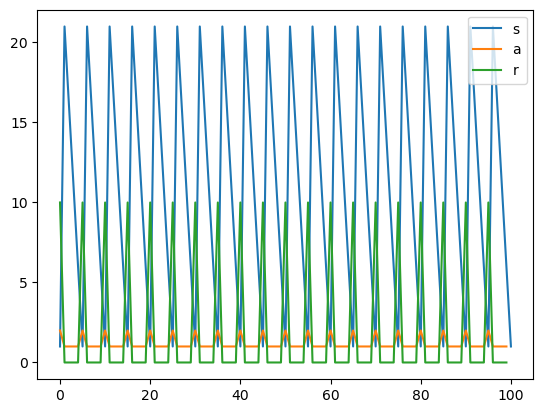

In [6]:
model.log().plot(save=True)
print(model.log.values['trajectory'])

# Plot data and save to png file
plt.plot(log['t'], log['s'])
plt.plot(log['t'][:-1], log['a'])
plt.plot(log['t'][:-1], log['r'])
plt.legend(['s', 'a', 'r'])
plt.savefig('figures/gridworld/test_gridworld.png')
plt.show()